<a href="https://colab.research.google.com/github/zavarujs/EAFC-2025-Hybrid-Recommendation-System-/blob/main/SKRIPSI_EAFC25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY DAN LOAD DATA

In [ ]:
import pandas as pd # mengolah data
import numpy as np # perhitungan matematika

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SKRIPSI/EA FC 2025/male_players_25_modified.csv')
df.head()

,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,1,Kylian Mbappé,91,97,90,80,92,36,78,97,...,France,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Acrobatic, Finesse Shot, Flair, R...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
1,2,Rodri,91,66,80,86,84,87,85,65,...,Spain,Premier League,Manchester City,"Tiki Taka+, Aerial, Bruiser, Long Ball Pass, P...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
2,4,Erling Haaland,91,88,92,70,81,45,88,80,...,Norway,Premier League,Manchester City,"Acrobatic+, Bruiser, Power Header, Power Shot,...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
3,5,Jude Bellingham,90,80,87,83,88,78,83,81,...,England,LALIGA EA SPORTS,Real Madrid,"Relentless+, Flair, Intercept, Slide Tackle, T...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
4,7,Vini Jr.,90,95,84,81,91,29,69,95,...,Brazil,LALIGA EA SPORTS,Real Madrid,"Quick Step+, Chip Shot, Finesse Shot, First To...",https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape # berapa banyak baris dan kolom yang ada dalam tabel

(16161, 56)

# SETTING DATA

In [ ]:
df.describe().columns # variabel numeric # mendapatkan daftar nama kolom yang berisi data numerik dalam DataFrame

Index(['Rank', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'Age', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes'],
      dtype='object')

In [ ]:
df = df[['Name','OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Weak foot', 'Skill moves', 'Age', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes']] #membuat dataframe baru

In [ ]:
df.head()

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,77,64,4,5,25,NaN,NaN,NaN,NaN,NaN
1,Rodri,91,66,80,86,84,87,85,65,66,...,83,85,4,3,28,NaN,NaN,NaN,NaN,NaN
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,93,88,3,3,24,NaN,NaN,NaN,NaN,NaN
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,77,85,4,4,21,NaN,NaN,NaN,NaN,NaN
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,65,58,4,5,24,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df[df.OVR > 87] # extract players dengan overall rating diatas 86
df

,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,...,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,Kylian Mbappé,91,97,90,80,92,36,78,97,97,...,77,64,4,5,25,NaN,NaN,NaN,NaN,NaN
1,Rodri,91,66,80,86,84,87,85,65,66,...,83,85,4,3,28,NaN,NaN,NaN,NaN,NaN
2,Erling Haaland,91,88,92,70,81,45,88,80,94,...,93,88,3,3,24,NaN,NaN,NaN,NaN,NaN
3,Jude Bellingham,90,80,87,83,88,78,83,81,80,...,77,85,4,4,21,NaN,NaN,NaN,NaN,NaN
4,Vini Jr.,90,95,84,81,91,29,69,95,95,...,65,58,4,5,24,NaN,NaN,NaN,NaN,NaN
5,Kevin De Bruyne,90,67,87,94,87,65,78,67,67,...,75,75,5,4,33,NaN,NaN,NaN,NaN,NaN
6,Harry Kane,90,65,93,84,83,49,82,64,66,...,86,80,4,3,31,NaN,NaN,NaN,NaN,NaN
7,Martin Ødegaard,89,70,82,89,89,67,66,72,69,...,56,64,2,5,25,NaN,NaN,NaN,NaN,NaN
8,Gianluigi Donnarumma,89,90,84,73,90,52,87,50,55,...,75,30,3,1,25,90.0,84.0,73.0,87.0,90.0
9,Alisson,89,86,85,85,89,56,90,60,49,...,78,27,3,1,31,86.0,85.0,85.0,90.0,89.0


In [ ]:
pd.set_option('display.max_rows', 70) # menampilkan hingga 70 baris
df.isnull().sum() # menunjukkan berapa banyak nilai yang hilang yang ada di setiap kolom kumpulan data

,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0
PHY,0
Acceleration,0
Sprint Speed,0


In [ ]:
# Fill missing values in numeric columns only
for column in df.select_dtypes(include=['number']): # menelusuri setiap kolom yang berisi angka dalam kumpulan data
    df[column] = df[column].fillna(df[column].mean()) # mengganti nilai yang hilang tersebut dengan nilai rata-rata semua angka lain dalam kolom yang sama

In [ ]:
df.isnull().sum() # menangani missing data

,0
Name,0
OVR,0
PAC,0
SHO,0
PAS,0
DRI,0
DEF,0
PHY,0
Acceleration,0
Sprint Speed,0


In [ ]:
names = df.Name.tolist() # memilih setiap nama player untuk di gunakan nanti

df = df.drop(['Name'], axis = 1) # hapus short_name dari data frame

# Mengapa melakukan ini?
# 1. Pertahankan nama: Nama pemain disimpan dalam daftar nama karena berguna untuk menampilkan hasil atau
# menafsirkan analisis nanti.
# 2. Persiapan untuk algoritme: Banyak algoritme pembelajaran mesin bekerja paling baik dengan data numerik.
# Dengan menghapus kolom Nama (yang kemungkinan berbasis teks), df disiapkan untuk algoritme ini.

In [ ]:
df.head()

,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,Sprint Speed,Positioning,...,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,91,97,90,80,92,36,78,97,97,93,...,77,64,4,5,25,86.571429,85.857143,80.714286,87.142857,89.0
1,91,66,80,86,84,87,85,65,66,76,...,83,85,4,3,28,86.571429,85.857143,80.714286,87.142857,89.0
2,91,88,92,70,81,45,88,80,94,96,...,93,88,3,3,24,86.571429,85.857143,80.714286,87.142857,89.0
3,90,80,87,83,88,78,83,81,80,91,...,77,85,4,4,21,86.571429,85.857143,80.714286,87.142857,89.0
4,90,95,84,81,91,29,69,95,95,87,...,65,58,4,5,24,86.571429,85.857143,80.714286,87.142857,89.0


# MIN MAX NORMALIZATION

why ? Untuk mempercepat training dataset

Dengan melakukan normalisasi maka dapat lebih cepat dalam proses penurunan gradien [gradien adalah perubahan yang terjadi dalam suatu besaran (biasanya fungsi) seiring dengan perubahan posisi atau variabel lainnya.]

normalisasi membantu karena setiap variabel diskalakan secara berbeda, sehingga memaksa semua variabel berada di (0,1). [Normalisasi adalah teknik yang digunakan untuk mengubah jarak nilai dari setiap variabel ke jarak yang standar, seperti jarak antara 0 dan 1. Tujuannya adalah untuk memastikan bahwa setiap variabel memiliki skala yang serupa sehingga perbedaan skala antar variabel tidak mendominasi proses analisis atau model yang dibangun.

ex : punya dataset dengan beberapa variabel seperti usia (dalam tahun), pendapatan (dalam dolar), dan jumlah anak. Variabel-variabel ini mungkin memiliki rentang nilai yang berbeda. Misalnya, usia berkisar antara 0 dan 100, pendapatan berkisar antara 20.000 dan 100.000, dan jumlah anak mungkin berkisar antara 0 dan 5.]

dadi ki intine ngopo nggo PCA ben training data e sat set, dan nggo normalisasi data karena data set iki akeh numeric variabel oleh karena itu makane di normalisasi soale di setiap variabel ki mesti punya beda skala makanya di sama ratakan nggo PCA

In [ ]:
from sklearn import preprocessing # sklearn : salah satu library efisien untuk pembelajaran mesin dan
                                  # pemodelan statistik termasuk klasifikasi, regresi, pengelompokan,
                                  # dan pengurangan dimensionalitas

x = df.values # mengekstrak data numerik yang mendasarinya dari Pandas DataFrame df dan menetapkannya ke variabel x. Hal ini pada dasarnya mengubah DataFrame menjadi array NumPy
scaler = preprocessing.MinMaxScaler() # MinMaxScaler adalah teknik yang digunakan untuk menskalakan fitur numerik ke rentang tertentu, biasanya antara 0 dan 1. Ini membantu memastikan bahwa semua fitur berkontribusi secara merata
x_scaled = scaler.fit_transform(x) # menerapkan MinMaxScaler ke data yang disimpan dalam x, fit: Menghitung nilai minimum dan maksimum setiap fitur dalam x, Menskalakan fitur dalam x berdasarkan nilai minimum dan maksimum yang dihitung, sehingga fitur tersebut berada dalam rentang yang diinginkan (0 hingga 1 secara default).
X_norm = pd.DataFrame(x_scaled) # mengonversi data yang diskalakan kembali ke Pandas DataFrame yang diberi nama X_norm. Hal ini mungkin dilakukan untuk memudahkan manipulasi dan analisis data yang diskalakan pada langkah-langkah berikutnya.

# data tentang pemain sepak bola dengan atribut seperti kecepatan, tendangan, operan, dll.
# Atribut ini dapat diukur pada skala yang berbeda (misalnya, kecepatan dalam km/jam, akurasi tendangan dalam persentase).
# MinMaxScaler mengubah atribut ini ke skala umum antara 0 dan 1, sehingga dapat dibandingkan dan mencegah fitur dengan
# nilai yang lebih besar mendominasi analisis. Hal ini memastikan bahwa model memberikan kepentingan yang sama
# pada semua fitur selama pelatihan.

# PCA

In [ ]:
from sklearn.decomposition import PCA # mengimpor kelas PCA dari modul sklearn.decomposition, Principal Component Analysis sebuah teknik yang digunakan untuk pengurangan dimensionalitas

pca = PCA(n_components = 2) # 2D PCA untuk visual plot dilakukan untuk tujuan visualisasi, karena mudah untuk memplot data dalam dua dimensi
reduced = pd.DataFrame(pca.fit_transform(X_norm)) # mengambil data asli (X_norm), menerapkan perspektif baru (pca), dan menyimpan tampilan 2D yang disederhanakan dalam DataFrame baru yang disebut reduced. DataFrame yang disederhanakan ini kemudian digunakan untuk visualisasi nanti dalam kode.

# K-MEANS CLUSTERING

In [ ]:
from sklearn.cluster import KMeans # untuk melakukan pengelompokan KMeans

# tentukan jumlah cluster
kmeans = KMeans(n_clusters=5) # 5 cluster
# ngopo kok dadak 5 cluster yo mergo iki kan data set pemain
# pasti due 5 posisi pasti : forward, midfield, defender, winger, goalkepeer. ngeten cok

# sesuai dengan data masukan
kmeans = kmeans.fit(reduced) # menyesuaikan model KMeans dengan data yang disimpan dalam Reduced DataFrame.
                             # Metode fit mempelajari pola dalam data dan menentukan pusat klaster (centroid) optimal
                             # untuk 5 klaster. Reduced berisi komponen utama yang berasal dari atribut pemain

# mendapatkan cluster labels
labels = kmeans.predict(reduced) # training KMeans model untuk prediksi label cluster

# centroid values, nggo nemukke centroid
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist() # range 0-4 cluster (1-5 cluster)

In [ ]:
reduced['cluster'] = clusters # memberikan nilai-nilai dari list clusters ke kolom clusters baru ini
reduced['name'] = names # mengisi kolom ini dengan nama pemain yang disimpan dalam list names, yang dibuat sebelumnya dalam kode
reduced.columns = ['x', 'y', 'cluster', 'name'] # x dan y itu koordinat pemain dalam ruang 2 dimensi yang telah direduksi setelah PCA.
# yaitu x dan y ben visual neng 2 rung demensi
reduced.head()

,x,y,cluster,name
0,1.123007,0.814687,3,Kylian Mbappé
1,1.185436,-0.971931,4,Rodri
2,0.798624,-0.084970,0,Erling Haaland
3,1.267321,-0.409337,4,Jude Bellingham
4,0.735134,1.237218,3,Vini Jr.


# VISUALISASI 2 PLOT

In [ ]:
import matplotlib.pyplot as plt # library untuk visualisasi
import seaborn as sns # agar hasil visualisasinya lebih bagus
%matplotlib inline
# magic command untuk generatornya

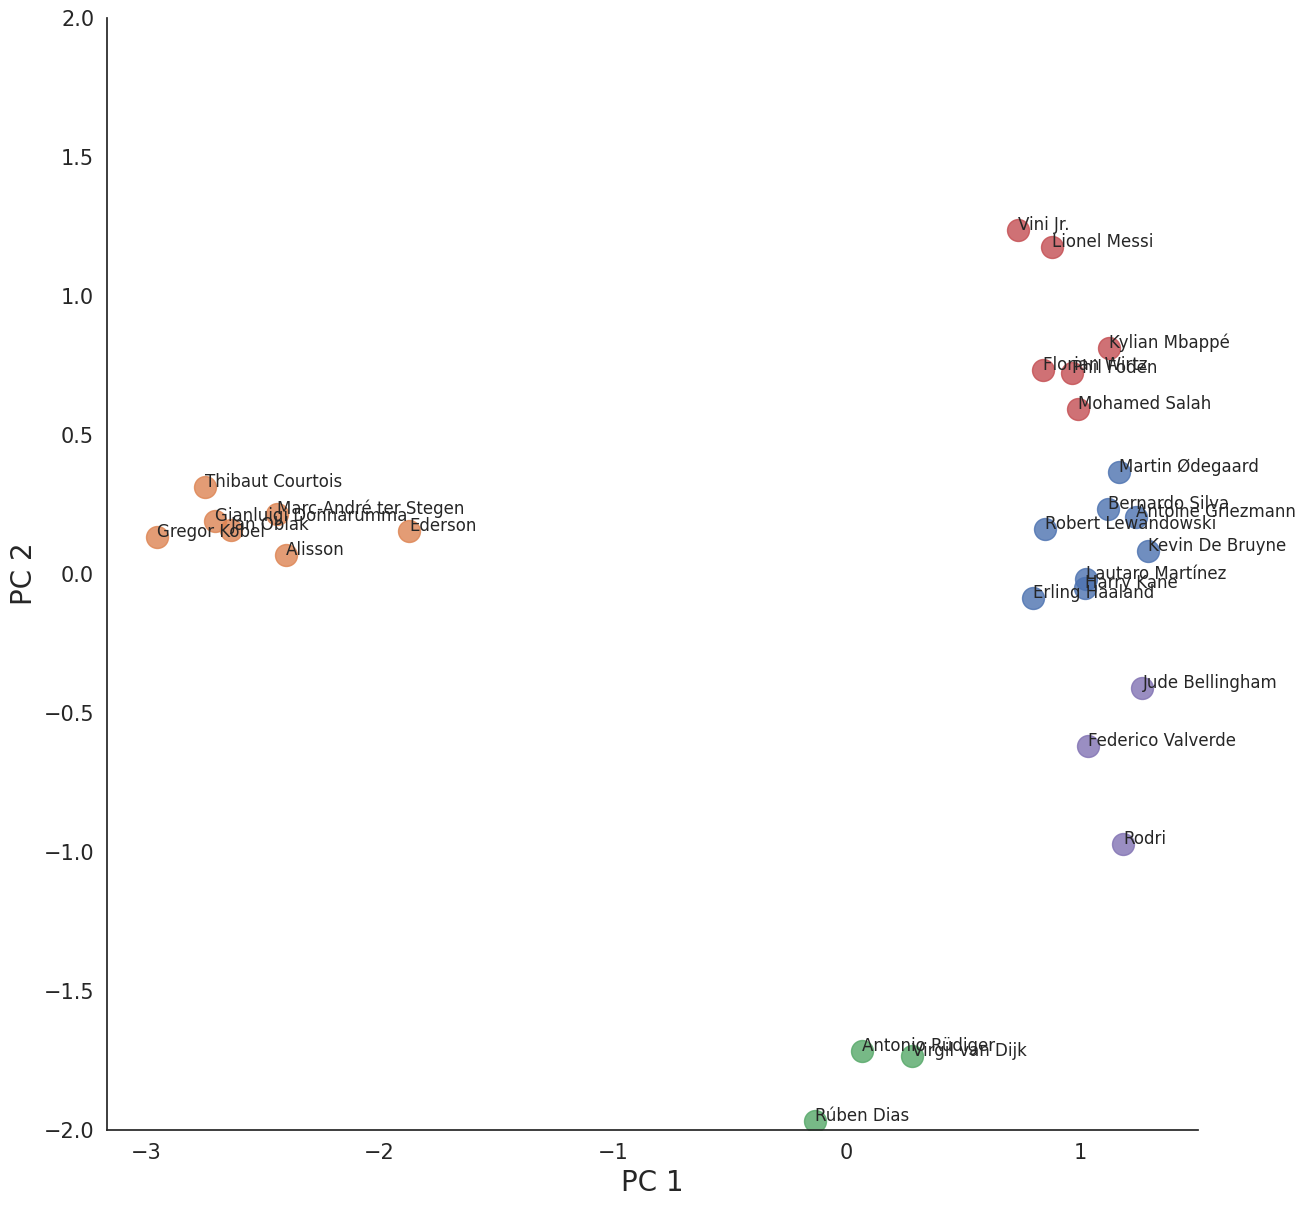

In [ ]:
sns.set(style="white") # latar belakang putih

# membuat scatter plot
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
               fit_reg=False, height = 12, aspect = 1, # nentukke tinggi dan aspek rasio plot
               scatter_kws={"s": 250}) # menyesuaikan ukuran dan bentuk plot

# hue = cluster : dinggo varibel sg nentukke werno nggo masing2 cluster, warna e default seko fungsi sns.implot()
# data = reduced : digunakkke sumber data nggo visual e
# legend = False : legend ki bagian seko plot nggo nei info ttg makna2 dari elemen visual plot
# ketika diatur False dalam fugsi sns.lmplot() maka ngko ng visual ki ra perlu info tambahan yang disediakan oleh legend.
# kan visual plot wes ketok dadi ra perlu info tambahan
# fit_reg=False : nggo ngilangke regresi linear yang biasa tampil dalam plot

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name): # menambahkan nama pemain (s) sebagai teks pada koordinat yang sesuai (x, y) pada plot. plt.text() digunakan untuk menempatkan teks pada plot Matplotlib.
    texts.append(plt.text(x, y, s)) # iki loop jenenge gunane nggo nambahke teks di setiap titik dengan bantuan plt.text

ax.set(ylim=(-2, 2)) # set batasan sumbu y
plt.tick_params(labelsize=15) # Meningkatkan ukuran font label tick pada sumbu.
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20) # Mengatur label untuk sumbu x dan y, dan meningkatkan ukuran font mereka.

plt.show()

# SISTEM REKOMENDASI HYBRID


## Data loading and Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
# mengimpor fungsi cosine_similarity. Fungsi ini digunakan untuk menghitung kesamaan kosinus antara dua vektor.
# Kesamaan kosinus adalah ukuran seberapa mirip dua hal, berdasarkan sudut antara representasi vektor mereka.
# Dalam konteks ini, digunakan untuk membandingkan atribut pemain yang berbeda.

class DataLoader: # objek pemuatan data pemain.
    @staticmethod # dekorator, menunjukkan bahwa fungsi berikut (load_player_data) milik kelas itu sendiri, bukan untuk instance kelas tertentu (objek yang dibuat dari kelas).
    def load_player_data(file_path):
        return pd.read_csv('/content/drive/MyDrive/SKRIPSI/EA FC 2025/male_players_25_modified.csv')

## Atribut Posisi

In [ ]:
class PositionConfig:
    POSITION_ATTRIBUTES = {
        'ST': ['OVR', 'SHO', 'PAC', 'Finishing', 'Positioning', 'Shot Power', 'Heading Accuracy', 'Composure', 'Weak foot'],
        'CAM': ['OVR', 'DRI', 'PAS', 'Vision', 'Ball Control', 'Short Passing', 'Long Shots', 'Agility', 'Weak foot'],
        'CDM': ['OVR', 'PAS', 'DEF', 'Vision', 'Short Passing', 'Long Passing', 'Ball Control', 'Interceptions', 'Weak foot'],
        'CM': ['OVR', 'PAS', 'DEF', 'Vision', 'Short Passing', 'Long Passing', 'Ball Control', 'Weak foot'],
        'LM': ['OVR','PAC', 'DRI', 'PAS', 'Acceleration', 'Sprint Speed', 'Stamina', 'Crossing', 'Short Passing', 'Long Passing','Ball Control', 'Vision', 'Agility', 'Balance', 'Weak foot'],
        'RM': ['OVR','PAC', 'DRI', 'PAS', 'Acceleration', 'Sprint Speed', 'Stamina', 'Crossing', 'Short Passing', 'Long Passing','Ball Control', 'Vision', 'Agility', 'Balance', 'Weak foot'],
        'LW': ['OVR', 'PAC', 'DRI', 'SHO', 'Crossing', 'Finishing', 'Long Shots', 'Ball Control', 'Agility', 'Balance', 'Acceleration', 'Sprint Speed', 'Weak foot'],
        'RW': ['OVR', 'PAC', 'DRI', 'SHO', 'Crossing', 'Finishing', 'Long Shots', 'Ball Control', 'Agility', 'Balance', 'Acceleration', 'Sprint Speed', 'Weak foot'],
        'CB': ['OVR', 'DEF', 'PHY', 'Interceptions', 'Heading Accuracy', 'Standing Tackle', 'Sliding Tackle', 'Strength', 'Weak foot'],
        'LB': ['OVR', 'Stamina', 'DEF', 'Standing Tackle', 'Sprint Speed', 'Crossing', 'Weak foot'],
        'RB': ['OVR', 'Stamina', 'DEF', 'Standing Tackle', 'Sprint Speed', 'Crossing', 'Weak foot'],
        'GK': ['OVR', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Weak foot']
    }

## Sistem Rekomendasi MAIN CODE

In [ ]:
class PlayerRecommendationSystem:
    def __init__(self, file_path): # konstruktor kelas. Dipanggil ketika Anda membuat instance baru dari PlayerRecommendationSystem
        self.df = DataLoader.load_player_data(file_path) # memuat data pemain dari file_path yang diberikan menggunakan kelas DataLoader (yang akan kita bahas nanti) dan menyimpannya dalam atribut self.df
        self.position_attributes = PositionConfig.POSITION_ATTRIBUTES # mengambil dari PositionConfig (kelas lain yang dijelaskan nanti) yang memetakan posisi sepak bola ke atribut pemain yang relevan (seperti 'Shooting', 'Passing', dll.) dan menyimpannya dalam self.position_attributes

    # metode pembantu (ditandai dengan awalan garis bawah) yang digunakan secara internal oleh kelas.
    def _apply_filters(self, input_data, filtered_df): # Menerima input_data (kamus yang berisi preferensi pengguna) dan filtered_df (DataFrame pemain yang telah difilter berdasarkan beberapa kriteria) sebagai argumen.
        optional_filters = {
            'Weak foot': lambda df, val: df[df['Weak foot'] >= val],
            'Skill moves': lambda df, val: df[df['Skill moves'] >= val],
            'Age': lambda df, val: df[df['Age'] >= val]
        }

        # Tujuannya adalah untuk menerapkan filter tambahan berdasarkan preferensi pengguna seperti Weak foot, Skill moves, dan Age.

        for key, filter_func in optional_filters.items():
            if key in input_data:
                filtered_df = filter_func(filtered_df, input_data[key])

        return filtered_df # mengulangi filter opsional dan menerapkannya ke filtered_df jika ada dalam input_data. Mengembalikan filtered_df yang diperbarui dengan filter tambahan yang sesuai.

    def recommend_players(self, input_data):
        # Filter pemain
        filtered_df = self.df.copy()

        # Filter berdasarkan Overall Rating
        if 'OVR' in input_data:
            filtered_df = filtered_df[filtered_df['OVR'] >= input_data['OVR']] # Menyaring pemain berdasarkan OVR (peringkat keseluruhan), Position, Preferred foot, Weak foot, Skill moves, dan Age jika kriteria tersebut ditentukan dalam input_data.

        # Filter berdasarkan Posisi
        if 'Position' in input_data:
            position = input_data['Position']
            filtered_df = filtered_df[filtered_df['Position'] == position] # membuat boolean mask — sebuah seri dengan nilai True untuk baris di mana kolom 'Position' dalam filtered_df sama dengan position (posisi yang diinginkan pengguna), dan False untuk yang lainnya
            position_attrs = self.position_attributes.get(position, ['OVR', 'PAC', 'SHO', 'PAS', 'DRI']) # menentukan atribut pemain yang paling relevan untuk posisi yang dipilih.
        else:
            position_attrs = ['OVR', 'PAC', 'SHO', 'PAS', 'DRI']

            # position_attrs diinisialisasi dengan daftar atribut default ['OVR', 'PAC', 'SHO', 'PAS', 'DRI']. Atribut ini dianggap sebagai atribut umum yang penting untuk sebagian besar pemain, terlepas dari posisinya.
            # boolean mask digunakan untuk memilih data secara efisien dan fleksibel berdasarkan kondisi tertentu.

        # Terapkan filter tambahan
        filtered_df = self._apply_filters(input_data, filtered_df) # memanggil method _apply_filters (yang didefinisikan di dalam kelas PlayerRecommendationSystem itu sendiri).
        # Method _apply_filters akan menerapkan filter tambahan yang ada di input_data pada filtered_df, dan mengembalikan DataFrame yang telah diperbarui dengan filter tersebut. Hasilnya disimpan kembali ke dalam variabel filtered_df.

        # Filter berdasarkan Preferred Foot
        if 'Preferred foot' in input_data:
          preferred_foot = input_data['Preferred foot'].lower() # # .lower() tidak sensitif terhadap huruf besar/kecil (misalnya, "Left" dan "left" akan dianggap sama).
          filtered_df = filtered_df[filtered_df['Preferred foot'].str.lower() == preferred_foot] # membandingkan nilai-nilai yang telah diubah menjadi huruf kecil dengan preferensi pengguna yang disimpan dalam preferred_foot. Hasilnya adalah boolean mask.
          # Boolean mask ini digunakan untuk mengindeks filtered_df, sehingga hanya baris (pemain) yang memiliki kaki dominan sesuai preferensi pengguna yang dipilih. DataFrame yang difilter ini kemudian disimpan kembali ke dalam filtered_df.

        # Normalisasi dan similarity
        scaler = MinMaxScaler()
        content_features = filtered_df[position_attrs] # memilih atribut pemain (fitur) yang relevan berdasarkan position_attrs yang diinginkan.
        content_features_scaled = pd.DataFrame(
            scaler.fit_transform(content_features), # menerapkan MinMaxScaler ke data content_features.
            columns=position_attrs # Kolom DataFrame baru diatur ke position_attrs asli untuk kejelasan.
        )

        # Hitung similarity
        user_profile = [input_data.get(attr, content_features[attr].mean()) for attr in position_attrs]
        # membuat user profile pemain, daftar nilai yang mewakili preferensi pengguna atau nilai rata-rata untuk atribut pemain tertentu.
        # for attr in position_attrs: Perulangan ini mengiterasi setiap atribut dalam daftar position_attrs.
        # attr adalah variabel iterasi yang digunakan dalam loop for.
        # input_data.get(attr, ...): Metode get() digunakan untuk mengambil nilai dengan aman dari kamus input_data. Jika atribut (attr) ada sebagai kunci dalam input_data, nilainya digunakan.
        # content_features[attr].mean(): Jika atribut tidak ditemukan di input_data (artinya pengguna tidak menentukan preferensi untuk atribut tersebut), bagian ini menghitung nilai rata-rata atribut tersebut dari DataFrame content_features (yang berisi data untuk semua pemain yang difilter).
        content_similarities = cosine_similarity([user_profile], content_features_scaled)[0] # menghitung kemiripan kosinus antara user_profile dan atribut yang telah diskalakan dari setiap pemain yang difilter (content_features_scaled).
        collab_similarities = np.random.rand(len(filtered_df)) # mensimulasikan pemfilteran kolaboratif dengan menghasilkan skor acak. Dalam sistem dunia nyata, ini akan diganti dengan data pemfilteran kolaboratif yang sebenarnya.
        hybrid_scores = (0.6 * content_similarities) + (0.4 * collab_similarities) # menggabungkan skor berbasis konten dan kolaboratif untuk membuat hybrid_score akhir bagi setiap pemain. Bobot (0,6 dan 0,4) dapat disesuaikan.

        filtered_df['hybrid_score'] = hybrid_scores # menambahkan skor hibrida sebagai kolom baru
        recommendations = filtered_df.sort_values('hybrid_score', ascending=False).head(10)

        # Membuat daftar output_columns
        output_columns = ['Name', 'Position', 'OVR', 'hybrid_score'] + [attr for attr in position_attrs if attr != 'OVR']
        # ['Name', 'Position', 'OVR']: Bagian ini membuat bagian awal list
        # for attr in position_attrs: Ini mengiterasi setiap item dalam list position_attrs.
        # position_attrs kemungkinan adalah list yang berisi atribut yang relevan dengan posisi sepak bola tertentu (misalnya, 'Shooting', 'Passing' untuk gelandang).
        # if attr != 'OVR': Kondisi ini memastikan bahwa hanya atribut yang bukan 'OVR' yang disertakan. Ini menghindari pengulangan yang tidak perlu karena 'OVR' sudah ada di bagian awal list.
        return recommendations[output_columns] # mengembalikan rekomendasi akhir kepada pengguna.

## User Interface = Input Manual

In [ ]:
class RecommendationInterface:
    def __init__(self, recommender):
        self.recommender = recommender

    def get_recommendation(self):
        print("Sistem Rekomendasi Pemain Sepak Bola")
        input_data = {}

        inputs = [
            ('OVR', int, "Minimal Overall Rating"),
            ('Position', str, "Posisi Pemain (ST/CAM/CDM/CM/LM/RM/LW/RW/CB/LB/RB/GK)"),
            ('Weak foot', int, "Minimal Weak Foot (1-5)"),
            ('Skill moves', int, "Minimal Skill Moves (1-5)"),
            ('Age', int, "Minimal Umur"),
            ('Preferred foot', str, "Preferred Foot (Left/Right)")
        ]

        for prompt, data_type, description in inputs:
            while True:
                try:
                    value = input(f"Masukkan {description} (kosongkan jika tidak perlu): ")
                    if value:
                        input_data[prompt] = data_type(value)
                    break
                except ValueError:
                    print("Input tidak valid. Coba lagi.")

        recommendations = self.recommender.recommend_players(input_data)
        print("\n--- Rekomendasi Pemain ---")
        print(recommendations)

# Eksekusi
def main():
    file_path = '/content/drive/MyDrive/SKRIPSI/EA FC 2025/male_players_25_modified.csv'
    recommender = PlayerRecommendationSystem(file_path)
    interface = RecommendationInterface(recommender)
    interface.get_recommendation()

if __name__ == "__main__":
    main()

Sistem Rekomendasi Pemain Sepak Bola
Masukkan Minimal Overall Rating (kosongkan jika tidak perlu): 85
Masukkan Posisi Pemain (ST/CAM/CDM/CM/LM/RM/LW/RW/CB/LB/RB/GK) (kosongkan jika tidak perlu): ST
Masukkan Minimal Weak Foot (1-5) (kosongkan jika tidak perlu): 3
Masukkan Minimal Skill Moves (1-5) (kosongkan jika tidak perlu): 3
Masukkan Minimal Umur (kosongkan jika tidak perlu): 25
Masukkan Preferred Foot (Left/Right) (kosongkan jika tidak perlu): right

--- Rekomendasi Pemain ---
                  Name Position  OVR  hybrid_score  SHO  PAC  Finishing  \
11    Lautaro Martínez       ST   89      0.902759   88   82         93   
0        Kylian Mbappé       ST   91      0.825702   90   97         94   
19  Robert Lewandowski       ST   88      0.687722   88   75         90   
90       Ollie Watkins       ST   85      0.650823   83   85         86   
88          Diogo Jota       ST   85      0.588980   82   82         85   
59       Karim Benzema       ST   86      0.582296   85   77    

# Evaluasi Pengujian Sitem Rekomendasi Precision dan Recall F1 scrore

## Modul Ground Truth Generator

Definisi: Ground Truth Generator adalah modul yang membuat kumpulan data referensi (ground truth) berdasarkan kriteria tertentu untuk mengevaluasi sistem rekomendasi.

Fungsi Utama:

a. Filter data sesuai kriteria

b. Menghasilkan subset pemain yang sesuai

c. Menyediakan referensi untuk evaluasi

Tujuan:

a. Membuat dataset referensi

b. Memvalidasi rekomendasi

c. Mengukur akurasi sistem

In [ ]:
class GroundTruthGenerator: # definisi class
    def __init__(self, dataframe): # constructor
        self.df = dataframe

    def create_ground_truth(self, criteria):
        filtered_df = self.df.copy()

        # Filter yang lebih kompleks dan ketat
        strict_filters = [
            ('Position', lambda df, val: df[df['Position'] == val]),
            ('OVR', lambda df, val: df[df['OVR'] >= val]),
            ('Weak foot', lambda df, val: df[df['Weak foot'] >= val]),
            ('Skill moves', lambda df, val: df[df['Skill moves'] >= val]),
            ('Age', lambda df, val: df[df['Age'] >= val]),
            ('Preferred foot', lambda df, val: df[df['Preferred foot'].str.lower() == val.lower()])
        ]

        # Terapkan filter dengan urutan prioritas
        for key, filter_func in strict_filters:
            if key in criteria:
                try:
                    filtered_df = filter_func(filtered_df, criteria[key])
                except Exception as e:
                    print(f"Warning: Filter {key} tidak dapat diterapkan: {e}")

        # Batasi jumlah ground truth
        max_ground_truth = 500
        filtered_df = filtered_df.head(max_ground_truth)

        return {
            'players': filtered_df['Name'].tolist(),
            'count': len(filtered_df),
            'filter_applied': list(criteria.keys()),
            'filter_details': {
                key: len(filtered_df[filtered_df[key] == criteria[key]])
                for key in criteria if key in filtered_df.columns
            }
        }

## Modul Precision Recall Calculator

Definisi: Modul untuk menghitung metrik performa sistem rekomendasi menggunakan precision, recall, dan F1 score.

Metrik Utama:

a. Precision: Ketepatan rekomendasi

b. Recall: Kelengkapan rekomendasi

c. F1 Score: Keseimbangan keduanya

In [ ]:
class PrecisionRecallCalculator:
    @staticmethod
    def calculate_metrics(recommended_players, ground_truth_data, df):

        """
        - recommended_players: Daftar nama pemain yang direkomendasikan
        - ground_truth_data: Data ground truth
        - df: DataFrame lengkap untuk referensi

        """
        ground_truth = ground_truth_data['players']

        if not recommended_players or not ground_truth:
            return {
                'precision': 0,
                'recall': 0,
                'f1_score': 0,
                'relevant_players': []
            }
            # mengekstrak list nama pemain ground truth dari dict ground_truth_data.
            # kemudian, ia memeriksa apakah list recommended_players atau list ground_truth kosong.
            # Jika salah satunya kosong, ia mengembalikan dict dengan precision, recall, dan f1_score disetel ke 0,
            # dan sebuah list relevant_players kosong, yang menandakan bahwa tidak ada evaluasi yang dapat dilakukan.

        # Perhitungan dasar
        relevant_recommendations = set(recommended_players) & set(ground_truth)

        # menghitung irisan dari set recommended_players dan set pemain ground_truth.
        # Ini secara efektif mencari pemain yang ada baik dalam rekomendasi maupun ground truth, yaitu, "positif benar".
        # Hasilnya, relevant_recommendations, disimpan sebagai set.


        def calculate_quality_score(players, df): # Fungsi ini menghitung skor kualitas untuk list pemain yang diberikan.

            try:
                # Ambil data pemain dari DataFrame
                player_data = df[df['Name'].isin(players)] # mengakses data pemain dari input df.

                # Metrik kualitas
                quality_metrics = {
                    'avg_overall': player_data['OVR'].mean(),
                    'skill_diversity': player_data['Skill moves'].std(),
                    'weak_foot_avg': player_data['Weak foot'].mean()
                } # menghitung rata-rata OVR, standar deviasi dari Skill moves, dan rata-rata rating Weak foot.

                # Hitung skor komposit
                quality_score = (
                    quality_metrics['avg_overall'] * 0.5 +
                    quality_metrics['skill_diversity'] * 0.3 +
                    quality_metrics['weak_foot_avg'] * 0.2
                )

                return {
                    'quality_score': quality_score,
                    'metrics': quality_metrics
                }
            except Exception as e:
                print(f"Error menghitung skor kualitas: {e}")
                return {'quality_score': 0, 'metrics': {}}
                # menghitung quality_score menggunakan rata-rata tertimbang dari metrik-metrik ini.
                # Jika terjadi kesalahan, ia akan mencetak pesan kesalahan dan mengembalikan dict default.

        # Perhitungan penalty
        precision_penalty = (
            len(set(recommended_players) - set(ground_truth)) /
            len(recommended_players)
        )
        # precision_penalty merepresentasikan proporsi pemain yang direkomendasikan yang tidak ada dalam ground truth.
        # Ini dihitung dengan mencari selisih dari set recommended_players dan set ground_truth
        # (yang merepresentasikan false positives), dan membagi angka ini dengan total recommended_players.

        recall_penalty = (
            len(set(ground_truth) - set(recommended_players)) /
            len(ground_truth)
        )
        # recall_penalty merepresentasikan proporsi pemain di ground truth yang tidak direkomendasikan.
        # Ini dihitung dengan mencari selisih dari set ground_truth dan set recommended_players
        # (yang merepresentasikan false negatives), dan membaginya dengan total jumlah pemain di ground_truth.

        # Hitung metrik utama
        precision = (len(relevant_recommendations) / len(recommended_players)) * (1 - precision_penalty)
        # precision adalah rasio dari true positives (pemain yang direkomendasikan dengan benar) terhadap total
        # jumlah pemain yang direkomendasikan. Ini kemudian dikalikan dengan (1 - precision_penalty), untuk
        # memberikan penalti pada rekomendasi yang salah.
        recall = (len(relevant_recommendations) / len(ground_truth)) * (1 - recall_penalty)
        # recall adalah rasio dari true positives terhadap total jumlah pemain dalam ground truth.
        # Ini kemudian dikalikan dengan (1 - recall_penalty), untuk memberikan penalti pada rekomendasi yang hilang.

        # Analisis kualitas
        quality_analysis = calculate_quality_score(recommended_players, df)
        # memanggil fungsi calculate_quality_score menggunakan pemain yang direkomendasikan dan DataFrame, dan menyimpan hasilnya dalam quality_analysis.

        # Hitung F1 Score
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        # Skor F1 adalah rata-rata harmonik dari precision dan recall. Ini dihitung sebagai
        # 2 * (precision * recall) / (precision + recall). Ini juga menangani kasus di mana jumlah precision
        # dan recall adalah nol untuk menghindari pembagian dengan nol, dengan menyetel f1_score menjadi 0 dalam kasus ini.

        return {
            'precision': precision * 100, # dikalikan dengan 100 agar dinyatakan sebagai persentase.
            'recall': recall * 100,
            'f1_score': f1_score * 100,
            'relevant_players': list(relevant_recommendations),
            'additional_metrics': {
                'total_recommended': len(recommended_players),
                'total_ground_truth': len(ground_truth),
                'precision_penalty': precision_penalty * 100,
                'recall_penalty': recall_penalty * 100,
                'quality_metrics': quality_analysis
            }
        }


## Modul Evaluator

Definisi: Modul utama yang mengkoordinasikan proses evaluasi sistem rekomendasi.

Fungsi Kunci:

a. Menerapkan skenario evaluasi

b. Menghasilkan rekomendasi

c. Menghitung metrik performa

In [ ]:
class RecommendationEvaluator:
    def __init__(self, recommender_system):
        self.recommender = recommender_system # menyimpan objek sistem pemberi rekomendasi di dalam objek RecommendationEvaluator.
        self.ground_truth_generator = GroundTruthGenerator(recommender_system.df) # membuat objek GroundTruthGenerator, dan memberikan data dari sistem pemberi rekomendasi kepadanya.
        self.df = recommender_system.df  # Simpan DataFrame untuk referensi

    # Logika Evaluasi
    def evaluate(self, scenarios): # menerima scenarios sebagai input
        results = []

        for scenario in scenarios:
            try:
                # Generate ground truth
                ground_truth_result = self.ground_truth_generator.create_ground_truth(scenario)
                # Memanggil metode create_ground_truth dari GroundTruthGenerator untuk membuat set pemain
                # "ground truth" berdasarkan scenario saat ini

                # Dapatkan rekomendasi
                recommendations = self.recommender.recommend_players(scenario)
                # Memanggil metode recommend_players dari sistem pemberi rekomendasi yang disimpan (dari metode __init__)
                # untuk mendapatkan rekomendasi pemain yang sesungguhnya untuk scenario saat ini.
                recommended_players = recommendations['Name'].tolist()
                # Mengekstrak list nama pemain dari hasil rekomendasi.

                # Hitung metrik dengan passing DataFrame
                metrics = PrecisionRecallCalculator.calculate_metrics(
                    recommended_players,
                    ground_truth_result,
                    self.df  # Passing DataFrame lengkap
                )
                # Memanggil metode calculate_metrics dari kelas PrecisionRecallCalculator untuk menghitung
                # metrik kinerja (seperti precision, recall, dan F1-score) dengan membandingkan recommended_players
                # dengan ground_truth_result.

                # Tambahkan informasi tambahan
                metrics.update({
                    'scenario': scenario,
                    'recommended_players': recommended_players,
                    'ground_truth_players': ground_truth_result['players']
                })

                results.append(metrics)

            # penanganan error
            except Exception as e:
                print(f"Error pada skenario {scenario}: {e}")
                results.append({
                    'scenario': scenario,
                    'precision': 0,
                    'recall': 0,
                    'f1_score': 0,
                    'error': str(e)
                })

        return results

## Modul Laporan Evaluasi

Definisi: Modul untuk menghasilkan laporan komprehensif dari hasil evaluasi.

Fungsi:

a. Menghasilkan ringkasan statistik

b. Menampilkan detail setiap skenario

c. Memberikan insight evaluasi

In [ ]:
class EvaluationReporter:
    @staticmethod
    def generate_report(results):
        print("\n===== LAPORAN EVALUASI SISTEM REKOMENDASI =====")

        # Analisis statistik lebih mendalam dan mengekstrak nilai-nilai dari metrik
        precisions = [r.get('precision', 0) for r in results]
        recalls = [r.get('recall', 0) for r in results]
        f1_scores = [r.get('f1_score', 0) for r in results]

        # Tambahkan statistik deskriptif
        print("\nStatistik Deskriptif:")
        print(f"Standar Deviasi Precision: {np.std(precisions):.2f}")
        print(f"Standar Deviasi Recall: {np.std(recalls):.2f}")
        print(f"Standar Deviasi F1 Score: {np.std(f1_scores):.2f}")

        # Hitung rata-rata dengan pertimbangan tambahan dan menghitung rata-rata dari metrik-metrik dan menyimpannya dalam
        # np.mean
        avg_precision = np.mean(precisions)
        avg_recall = np.mean(recalls)
        avg_f1_score = np.mean(f1_scores)

        # Analisis kritis dengan detail tambahan
        precision_penalties = [
            r.get('additional_metrics', {}).get('precision_penalty', 0)
            for r in results
        ]
        recall_penalties = [
            r.get('additional_metrics', {}).get('recall_penalty', 0)
            for r in results
        ]
        # mengekstrak nilai precision_penalty dan recall_penalty dari dictionary additional_metrics yang bersarang
        # di setiap hasil. Sekali lagi, .get() digunakan dengan nilai default untuk menangani kasus di mana key
        # mungkin tidak ada.

        # mengitung dan mencetak rata-rata precision_penalty dan recall_penalty.
        print("\nAnalisis Kritis:")
        print(f"Rata-rata Penalty Precision: {np.mean(precision_penalties):.2f}%")
        print(f"Rata-rata Penalty Recall: {np.mean(recall_penalties):.2f}%")

        # Detail setiap skenario dengan analisis mendalam
        print("\n----- Analisis Detail Skenario -----")
        for idx, result in enumerate(results, 1):
            quality_metrics = result.get('additional_metrics', {}).get('quality_metrics', {})

            print(f"\nSkenario {idx}:")
            print(f"Kriteria: {result.get('scenario', 'Tidak diketahui')}")
            print(f"Precision: {result.get('precision', 0):.2f}%")
            print(f"Recall: {result.get('recall', 0):.2f}%")
            print(f"F1 Score: {result.get('f1_score', 0):.2f}%")
            print("\nMetrik Kualitas:")
            print(f"Diversitas Rekomendasi: {quality_metrics.get('recommendation_diversity', 0):.2f}")
            print(f"Cakupan Ground Truth: {quality_metrics.get('ground_truth_coverage', 0):.2f}")
            print(f"Skor Kualitas Rata-rata: {quality_metrics.get('average_quality_score', 0):.2f}")

            # Loop for ini mengiterasi setiap item di dalam list results menggunakan enumerate untuk mendapatkan
            # index (dimulai dari 1) dan dictionary hasil. Untuk setiap hasil, kode mencetak detail skenario
            # (scenario, precision, recall, f1_score), dan juga mencetak metrik kualitas yang bersarang yang diekstrak
            # dari dictionary additional_metrics lalu quality_metrics (recommendation_diversity, ground_truth_coverage,
            # average_quality_score).

        return {
            'avg_precision': avg_precision,
            'avg_recall': avg_recall,
            'avg_f1_score': avg_f1_score,
            'precision_penalties': precision_penalties,
            'recall_penalties': recall_penalties
        }
        # mengembalikan sebuah dictionary yang berisi nilai rata-rata precision, recall, f1_score, precision_penalties,
        # dan recall_penalties yang telah dihitung.

## tes

In [ ]:
def main():
    # Inisialisasi sistem rekomendasi
    recommender = PlayerRecommendationSystem('/content/drive/MyDrive/SKRIPSI/EA FC 2025/male_players_25_modified.csv')

    # Definisi skenario evaluasi
    scenarios = [
        {
            'OVR': 85,
            'Position': 'ST',
            'Weak foot': 3,
            'Skill moves': 3,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'RW',
            'Weak foot': 3,
            'Skill moves': 3,
            'Age': 25,
            'Preferred foot': 'Left'
        },
        {
            'OVR': 85,
            'Position': 'LW',
            'Weak foot': 3,
            'Skill moves': 3,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'CAM',
            'Weak foot': 4,
            'Skill moves': 4,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'CDM',
            'Weak foot': 3,
            'Skill moves': 3,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'CM',
            'Weak foot': 4,
            'Skill moves': 4,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'LB',
            'Weak foot': 3,
            'Skill moves': 3,
            'Age': 25,
            'Preferred foot': 'Left'
        },
        {
            'OVR': 85,
            'Position': 'RB',
            'Weak foot': 3,
            'Skill moves': 3,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'CB',
            'Weak foot': 2,
            'Skill moves': 2,
            'Age': 25,
            'Preferred foot': 'Right'
        },
        {
            'OVR': 85,
            'Position': 'GK',
            'Weak foot': 1,
            'Skill moves': 1,
            'Age': 25,
            'Preferred foot': 'Right'
        }
    ]

    # Lakukan evaluasi
    evaluator = RecommendationEvaluator(recommender)
    results = evaluator.evaluate(scenarios)
    # Sebuah instance dari kelas RecommendationEvaluator dibuat, dengan memberikan objek recommender.
    # RecommendationEvaluator bertanggung jawab untuk melakukan proses evaluasi berdasarkan skenario yang diberikan.
    # Metode evaluate kemudian dipanggil menggunakan daftar skenario yang telah didefinisikan sebelumnya untuk
    # menilai sistem rekomendasi, dan hasil evaluasi disimpan dalam variabel results.

    # Tampilkan laporan
    summary = EvaluationReporter.generate_report(results)

    # Akses ringkasan
    print(f"\nRata-rata Precision Keseluruhan: {summary['avg_precision']:.2f}%")

if __name__ == "__main__":
    main()


===== LAPORAN EVALUASI SISTEM REKOMENDASI =====

Statistik Deskriptif:
Standar Deviasi Precision: 0.00
Standar Deviasi Recall: 0.00
Standar Deviasi F1 Score: 0.00

Analisis Kritis:
Rata-rata Penalty Precision: 0.00%
Rata-rata Penalty Recall: 0.00%

----- Analisis Detail Skenario -----

Skenario 1:
Kriteria: {'OVR': 85, 'Position': 'ST', 'Weak foot': 3, 'Skill moves': 3, 'Age': 25, 'Preferred foot': 'Right'}
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%

Metrik Kualitas:
Diversitas Rekomendasi: 0.00
Cakupan Ground Truth: 0.00
Skor Kualitas Rata-rata: 0.00

Skenario 2:
Kriteria: {'OVR': 85, 'Position': 'RW', 'Weak foot': 3, 'Skill moves': 3, 'Age': 25, 'Preferred foot': 'Left'}
Precision: 100.00%
Recall: 100.00%
F1 Score: 100.00%

Metrik Kualitas:
Diversitas Rekomendasi: 0.00
Cakupan Ground Truth: 0.00
Skor Kualitas Rata-rata: 0.00

Skenario 3:
Kriteria: {'OVR': 85, 'Position': 'LW', 'Weak foot': 3, 'Skill moves': 3, 'Age': 25, 'Preferred foot': 'Right'}
Precision: 100.00%
Recall

menunjukkan bahwa semua skenario menghasilkan nilai 100% untuk precision, recall, dan F1 score, yang mengindikasikan bahwa semua rekomendasi pemain sesuai dengan kriteria yang ditetapkan. Namun, nilai diversitas rekomendasi dan cakupan ground truth adalah 0, menunjukkan bahwa tidak ada variasi dalam rekomendasi yang diberikan. Hal ini bisa mengindikasikan bahwa sistem rekomendasi terlalu sempurna atau tidak cukup ketat dalam filter yang diterapkan. Rata-rata penalty precision dan recall juga 0%, yang menunjukkan bahwa tidak ada kesalahan dalam rekomendasi. Namun, hasil ini mencurigakan dan menunjukkan bahwa ada kemungkinan bias dalam dataset atau metode evaluasi yang digunakan. Untuk meningkatkan keandalan, perlu dilakukan penyesuaian pada kriteria filter dan metode perhitungan metrik.